<a href="https://colab.research.google.com/github/JackWang-Zhe/Hello/blob/main/Competition%20%2343680%20%E2%80%93%20Wang%2CZhe%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
# use the API to retrive the data in csv form and read data using panda
url = "https://data.lacity.org/resource/9w5z-rg2h.csv"
response = requests.get(url)
if response.status_code == 200:
    csv_data = response.text
    df = pd.read_csv(io.StringIO(csv_data))
    print(df.head())
else:
    print(f"Failed to fetch data: {response.status_code}")



                     address             permit   permit_status  \
0  10000 W SANTA MONICA BLVD  14044 10000 02293          Issued   
1        1000 S SANTA FE AVE  15016 10000 18196  Permit Finaled   
2       3680 N BUENA PARK DR  15014 10000 04931          Issued   
3     1001 N LINDENWOOD LANE  16042 90000 14712  Permit Finaled   
4          2836 S ANCHOR AVE  15016 20001 17211     CofO Issued   

           inspection_date         inspection inspection_result  \
0  2016-07-20T00:00:00.000  Rough-Ventilation  Partial Approval   
1  2016-07-22T00:00:00.000    Smoke Detectors    Insp Cancelled   
2  2016-07-18T00:00:00.000         Insulation          Approved   
3  2016-07-20T00:00:00.000              Final    Permit Finaled   
4  2016-07-18T00:00:00.000         Inspection    Permit Finaled   

                  lat_lon  
0  (34.06364, -118.41437)  
1  (34.03143, -118.22981)  
2  (34.13745, -118.38853)  
3  (34.07732, -118.48578)  
4  (34.03878, -118.39963)  


In [13]:
# do some data cleaning and integrity check
missing = df.isnull().sum() #this is a very general integrity check BTW, I will add more specific check later
print(f"Missing Values:\n{missing}")
# check for duplicates
duplicates = df.duplicated(keep=False)
print(f"Duplicate Permits: {duplicates.sum()}")

#print out duplicates, double checking
duplicate_rows = df[duplicates]
duplicate_groups = duplicate_rows.groupby(list(df.columns))
for group, rows in duplicate_groups:
    if len(rows) > 1:
        print(rows)
        print("-----")
        break  # remove break to see more groups if desired

df.drop_duplicates(inplace=True)

Missing Values:
address              0
permit               0
permit_status        0
inspection_date      0
inspection           0
inspection_result    0
lat_lon              0
dtype: int64
Duplicate Permits: 60
                address             permit permit_status  \
540  10334 W LORENZO DR  16047 30000 00225   CofO Issued   
541  10334 W LORENZO DR  16047 30000 00225   CofO Issued   

             inspection_date  inspection inspection_result  \
540  2016-07-18T00:00:00.000  Inspection    Permit Finaled   
541  2016-07-18T00:00:00.000  Inspection    Permit Finaled   

                    lat_lon  
540  (34.04033, -118.40777)  
541  (34.04033, -118.40777)  
-----


permit_status     inspection_result       
CofO Corrected    CofO Corrected                1
CofO Issued       Permit Finaled               17
                  CofO Issued                   7
                  CofO in Progress              4
                  OK for CofO                   2
                  Approved                      1
CofO in Progress  OK for CofO                   8
                  CofO in Progress              6
                  Conditional Approval          3
                  Approved                      2
                  Not Ready for Inspection      2
                  OK to Issue CofO              2
                  Corrections Issued            1
Issued            Approved                    198
                  Insp Scheduled              149
                  Partial Approval            105
                  Not Ready for Inspection     95
                  Corrections Issued           37
                  Conditional Approval         36
       

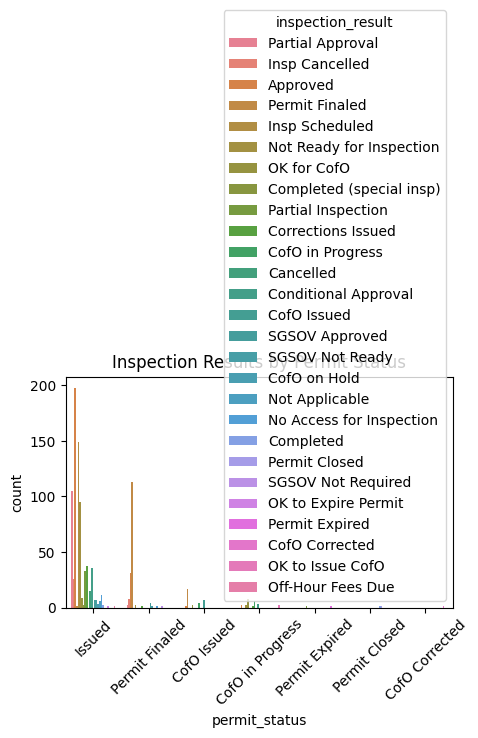

In [29]:
#                   This part is written by me
#Since there are many diversity in the type of Inspection_Result, making the my
#countplot a bit messy. So I will ask the Copilot to generate a sub-countplot, each for a permit type
permit_inspection=df.groupby('permit_status')['inspection_result'].value_counts()
print(permit_inspection)
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='permit_status', hue= 'inspection_result')
plt.title('Inspection Results by Permit Status')
plt.xticks(rotation=45)
plt.show()



<ipython-input-28-420a874fb127>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='inspection_result', data=status_data, palette='viridis')
<ipython-input-28-420a874fb127>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='inspection_result', data=status_data, palette='viridis')
<ipython-input-28-420a874fb127>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='inspection_result', data=status_data, palette='viridis')
<ipython-input-28-420a874fb127>:27: FutureWarning: 

Passing `palette` without assigning

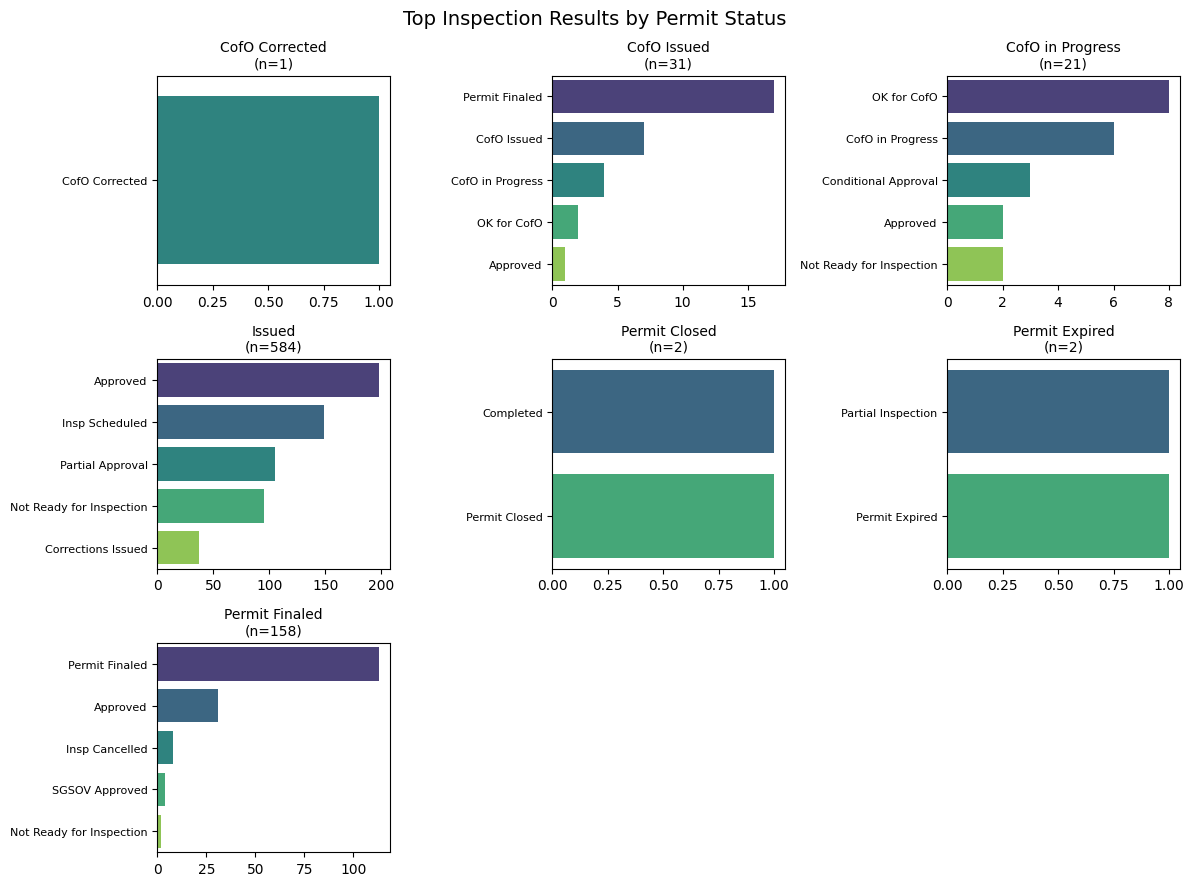

In [28]:
#----------------------------------------------
#this part is generated by AI, Copilot
#Since there are many diversity in the type of Inspection_Result, making the my previous
#countplot a bit messy. So I ask the Copilot to generate a sub-countplot, each for a permit type

# Convert to DataFrame and reset index
df_stack = permit_inspection.reset_index(name='count')

# Create subplots for each permit status
unique_statuses = df_stack['permit_status'].unique()
n_cols = 3
n_rows = (len(unique_statuses) + n_cols - 1) // n_cols

plt.figure(figsize=(12, 3*n_rows))
plt.subplots_adjust(hspace=0.8, wspace=0.3)

for idx, status in enumerate(unique_statuses):
    ax = plt.subplot(n_rows, n_cols, idx+1)

    # Filter data for current permit status
    status_data = df_stack[df_stack['permit_status'] == status]

    # Sort and get top 5 results
    status_data = status_data.sort_values('count', ascending=False).head(5)

    # Create horizontal bar plot
    sns.barplot(x='count', y='inspection_result', data=status_data, palette='viridis')
    plt.title(f'{status}\n(n={status_data["count"].sum()})', fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    ax.tick_params(axis='y', labelsize=8)

plt.suptitle('Top Inspection Results by Permit Status', y=0.98, fontsize=14)
plt.tight_layout()
plt.show()

The data shows us some interesting trends in how building inspections are handled.
My first observation is that "Issued" permits are the most dominant, followed by "Permit Finaled", I think this is an indication that we are having lots of builidng under construction.

A lot of permits are marked as "Issued," but many of these have results like "Partial Approval" (105 times) or "Not Ready for Inspection" (95 times). This tells us that the contractors often turn in their works that are not fully ready, and they have to go back and forth to fix things multiple times.
This tells us that contractors often turn in work that's not fully ready or up to code, so they have to go back and fix things multiple times. This back-and-forth wastes admin resources and slows down projects, which can end up costing developers and taxpayers more money.

Under the permit status category "CofO Issued", I also see that there’s a gap between "Permit Finaled" and "CofO Issued"—there are 17 cases of permits being finaled, but only 7 cases where a CofO is actually issued. This could suggests that even after inspections, the final approval takes too long, probably due to extra paperwork or delays in the process. I am not actually sure about this, I am not very familiar with construction workflow

Overall, I think these patterns point to a need for things like a checklist before submission to catch mistakes early, and use digital automation tools to speed up the final approval process.



(34.06364, -118.41437)
<class 'str'>
Invalid coordinates: 0
Statistical outliers: 22


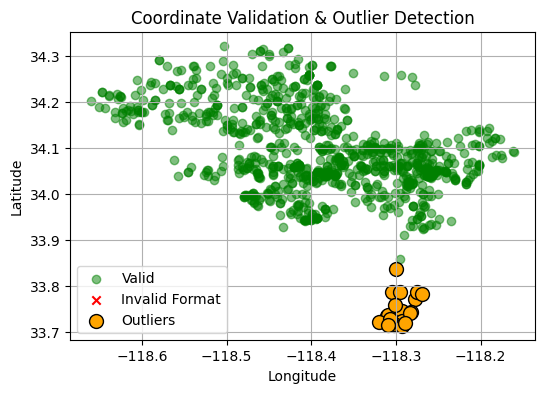

In [66]:
#Q2

print(df['lat_lon'][0])
print(type(df['lat_lon'][0]))
import re


#--------------------------------------------------------------------------
#check data integrity and outliers, this part is generated by Copilot
coord_pattern = r'^\((-?\d+\.\d+),\s*(-?\d+\.\d+)\)$'
def parse_coords(coord_str):
    match = re.match(coord_pattern, coord_str)
    if match:
        lat, lon = map(float, match.groups())
        valid = (-90 <= lat <= 90) and (-180 <= lon <= 180)
        return pd.Series([lat, lon, valid])
    return pd.Series([None, None, False])

df[['latitude', 'longitude', 'is_valid']] = df['lat_lon'].apply(parse_coords)

print(f"Invalid coordinates: {len(df[~df['is_valid']])}")

# calculate IQR for outliers
def find_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return ~series.between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

df['lat_outlier'] = find_iqr_outliers(df['latitude'])
df['lon_outlier'] = find_iqr_outliers(df['longitude'])
df['is_outlier'] = df['lat_outlier'] | df['lon_outlier']

print(f"Statistical outliers: {df['is_outlier'].sum()}")
#--------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Plot valid points
valid = df[df['is_valid'] & ~df['is_outlier']]
plt.scatter(valid['longitude'], valid['latitude'],
           c='green', alpha=0.5, label='Valid')

# Plot invalid points
invalid = df[~df['is_valid']]
plt.scatter(invalid['longitude'], invalid['latitude'],
           c='red', marker='x', label='Invalid Format')

# Plot statistical outliers
outliers = df[df['is_outlier'] & df['is_valid']]
plt.scatter(outliers['longitude'], outliers['latitude'],
           c='orange', s=100, edgecolors='black', label='Outliers')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinate Validation & Outlier Detection')
plt.legend()
plt.grid(True)
plt.show()

                             address  inspection_count
800              900 W WILSHIRE BLVD                 6
26         10250 W SANTA MONICA BLVD                 5
96              11933 W ALLEGHENY ST                 5
660                   6150 W 96TH ST                 5
790         8822 W CADILLAC AVE 1-15                 4
472                345-347 W 73RD ST                 3
650                 601 N FULLER AVE                 3
671             6245 W WILSHIRE BLVD                 3
431             3033 W WILSHIRE BLVD                 3
122             12360 W OSBORNE PL 2                 3
103                 1200 S GRAND AVE                 3
51             10777 W WILSHIRE BLVD                 3
552             4424 N VAN NOORD AVE                 3
795                   8905 W 24TH ST                 3
328             19401 W PARTHENIA ST                 3
365                2215 E ALCAZAR ST                 3
8    10000 W SANTA MONICA BLVD 1-283                 3
593       

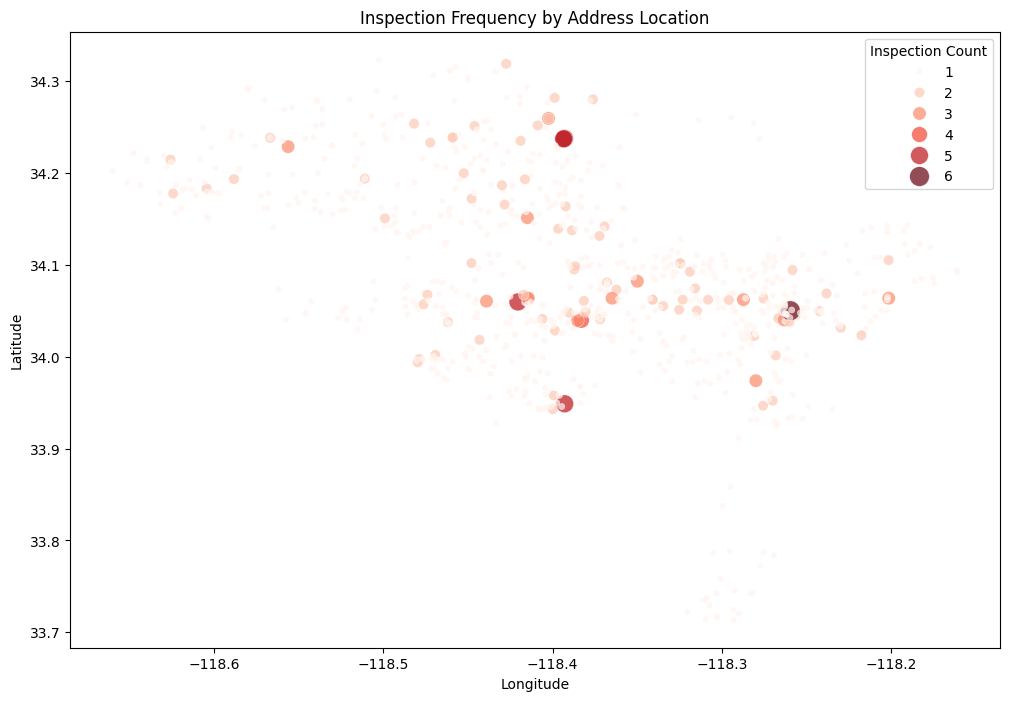

In [44]:
# count inspections per address
inspections_per_address = df.groupby('address').size().reset_index(name='inspection_count')
inspections_per_address = inspections_per_address.sort_values('inspection_count', ascending=False)
print(inspections_per_address.head(20))

# Merge inspection counts with coordinates
geo_data = df[['address', 'lat_lon']].drop_duplicates()
geo_data = geo_data.merge(inspections_per_address, on='address')

# Extract lat/lon
geo_data[['lat', 'lon']] = geo_data['lat_lon'].str.extract(r'\(([\d.]+),\s*([\d.-]+)\)').astype(float)

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=geo_data,
    x='lon',
    y='lat',
    size='inspection_count',
    hue='inspection_count',
    sizes=(20, 200),
    palette='Reds',
    alpha=0.7
)
plt.title('Inspection Frequency by Address Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Inspection Count')
plt.show()

This suggests that central parts (in-towns) of the region have a much higher level of inspection activity than others.

In [77]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive, SelectMultiple
import pandas as pd

#I wrote this part.
#Those who got final aproval, such as Permit Finaled and CofO Issued
#will be marked green, failed approval will be marked in orange or red
result_colors = {
    'Approved': 'blue',
    'Partial Approval': 'orange',
    'Not Ready for Inspection': 'red',
    'Permit Finaled': 'green',
    'CofO Issued': 'green'
}
df['color'] = df['inspection_result'].map(result_colors).fillna('gray')
print("counts of each color category:")
print(df['color'].value_counts())


#------------------------------------------
#This interactive function is done by Copilot AI



# Define a function to update the plot based on selected colors.
def update_plot(selected_colors):
    # Debug print (optional)
    print("Selected colors:", selected_colors)

    # If "All" is selected or nothing is selected, show all points
    if not selected_colors or "All" in selected_colors:
        plot_df = df.copy()
        title_str = "Inspection Results by Location (All)"
    else:
        # Filter the DataFrame to only rows with colors in the selected set
        plot_df = df[df['color'].isin(selected_colors)]
        title_str = "Inspection Results by Location (Filtered: " + ", ".join(selected_colors) + ")"

    plt.figure(figsize=(12, 8))
    plt.scatter(plot_df['lon'], plot_df['lat'], c=plot_df['color'], alpha=0.6, s=50)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(title_str)
    plt.grid(True)
    plt.show()

# Create a SelectMultiple widget. The default value here is ("All",) so by default all points are plotted.
color_options = ["All", "blue", "orange", "red", "green"]
color_widget = SelectMultiple(
    options=color_options,
    value=("All",),  # Default selection as a tuple
    description="Colors",
    disabled=False
)

# Connect the widget to the update function
interactive_plot = interactive(update_plot, selected_colors=color_widget)
display(interactive_plot)


counts of each color category:
color
gray      392
blue      232
green     138
orange    107
red        99
Name: count, dtype: int64


interactive(children=(SelectMultiple(description='Colors', index=(0,), options=('All', 'blue', 'orange', 'red'…

Overall, while the majority of inspections are approved (blue), the presence and clusters of orange and red indicate that negative outcomes can appear anywhere, although some regions may show a slightly higher incidence. This suggests that while location might play a role in inspection outcomes, other factors could be influencing the results as well.

In [61]:
#This is Q2, Were there any permits that did not get an inspection?
#the idea is, if there is an inspection, there will be a inspectiot date. so we check
#if there is any permit without a valid inspection date. There is none.

# again, this RE is generated by Copilot
datetime_pattern = r'^\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{3}$'

# check for invalid formats (including NaN and malformed strings)
invalid_dates = ~df['inspection_date'].astype(str).str.match(datetime_pattern, na=False)
uninspected = df[invalid_dates]

print(f"Permits with invalid inspections: {len(uninspected)}")



Permits with invalid inspections: 0


Center Latitude: 34.087931528925616 Center Longitude: -118.38379174586775
   latitude  longitude  distance
0  34.06364 -118.41437  0.039053
1  34.03143 -118.22981  0.164021
2  34.13745 -118.38853  0.049745
3  34.07732 -118.48578  0.102539
4  34.03878 -118.39963  0.051640


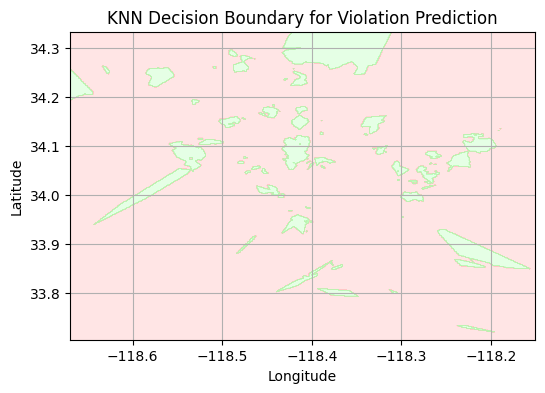

In [70]:

from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

#Q3
#I am actually dont understand how to have a model that "quantify"
#If we want to caputre the sptial correlation,i.e. place of origin and inspection result,
#I think using KNN would be a much better choice,
#However, if we have to develop a model that can "quantify" the relationship, i.e. a logstic regression model
#I can try to use the Eculidean distance as the variable
#But first, Let me develop and visualize a KNN model

#First, convert inspection results into binary label, the result is either postive or negative
def determine_violation(result):
    negative_results = ['Partial Approval', 'Not Ready for Inspection', 'Insp Cancelled']
    return 1 if result in negative_results else 0

df['violation'] = df['inspection_result'].apply(determine_violation)



#get the corrdinates and label
X = df[['longitude', 'latitude']].values
y = df['violation'].values
#generate a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)



#---------------------------------------
#The code for plotting is genearted by Copilot
# Create a mesh grid over the data range to plot the decision boundary.
x_min, x_max = X[:, 0].min() - 0.01, X[:, 0].max() + 0.01
y_min, y_max = X[:, 1].min() - 0.01, X[:, 1].max() + 0.01
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict the classifier output for each point in the mesh.
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid_points)
Z = Z.reshape(xx.shape)

# Create a custom color map for visualization.
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#008800'])

# Plot the decision boundary and data points.
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
p#lt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KNN Decision Boundary for Violation Prediction')
plt.grid(True)
plt.show()


In [67]:
#Develop a logstic model
# compute the center of your coordinates
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

# compute Euclidean distance
df['distance'] = np.sqrt((df['latitude'] - center_lat)**2 + (df['longitude'] - center_lon)**2)


print("Center Latitude:", center_lat, "Center Longitude:", center_lon)
print(df[['latitude', 'longitude', 'distance']].head())

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

X_distance = df[['distance']]
y = df['violation']
model_distance = LogisticRegression(solver='liblinear')
model_distance.fit(X_distance, y)

#-------------------------
#The printing of performance metric is gnereated by Copilot
# Assess performance on the training data
y_pred_distance = model_distance.predict(X_distance)
accuracy_distance = accuracy_score(y, y_pred_distance)
auc_distance = roc_auc_score(y, model_distance.predict_proba(X_distance)[:, 1])
logloss_distance = log_loss(y, model_distance.predict_proba(X_distance))

print("Accuracy:", accuracy_distance)
print("ROC AUC:", auc_distance)
print("Log Loss:", logloss_distance)
print("Coefficient for distance:", model_distance.coef_[0][0])

# Compute and report odds ratio
odds_ratio_distance = np.exp(model_distance.coef_[0][0])
print("Odds Ratio for distance:", odds_ratio_distance)


Center Latitude: 34.087931528925616 Center Longitude: -118.38379174586775
   latitude  longitude  distance
0  34.06364 -118.41437  0.039053
1  34.03143 -118.22981  0.164021
2  34.13745 -118.38853  0.049745
3  34.07732 -118.48578  0.102539
4  34.03878 -118.39963  0.051640
Model Using Only Distance as Predictor
---------------------------------------
Accuracy: 0.7520661157024794
ROC AUC: 0.5240384615384616
Log Loss: 0.5597025669047517
Coefficient for distance: 0.4417051069545996
Odds Ratio for distance: 1.5553570088340327


The KNN model that we plotted shows a fuzzy decision boundary on the map. Although the boundary hints that out-of town areas might have higher risk of violation, the clear separation isn’t very defined. This hint that while distance matters, it likely isn’t the only factor affecting inspection outcomes.

For the Logstic model, When we used distance as the sole variable of inspection violations, the model produced a positive coefficient of about 0.44. This means that, for each one‑unit increase in distance, the odds of a violation increase by roughly 56% (odds ratio of 1.56). In other words, projects farther from the center tend to have a higher chance of violations. However, the overall performance of this model is weak. The ROC AUC is just 0.524, which is barely better than random guessing. Accuracy is around 75%, but this is a bit misleading as we have a signicant amount of postive cases than negative cases.

As a clear response, there is no strong evidence prove the association between distances and chances of violations



                   inspection  sum  count  violation_rate
26              Fill/Backfill    2      2             1.0
63     Posting Pre-Inspection    1      1             1.0
40              HEATING-Final    1      1             1.0
76          Rough-Ventilation    3      3             1.0
62  Pool Equipment Noise Test    1      1             1.0
..                        ...  ...    ...             ...
87              T-Bar Ceiling    0      5             0.0
85     Structural Steel Frame    0      2             0.0
92          Underground Flush    0      1             0.0
95       Water Heater or Vent    0      1             0.0
97                       Weld    0      1             0.0

[99 rows x 4 columns]


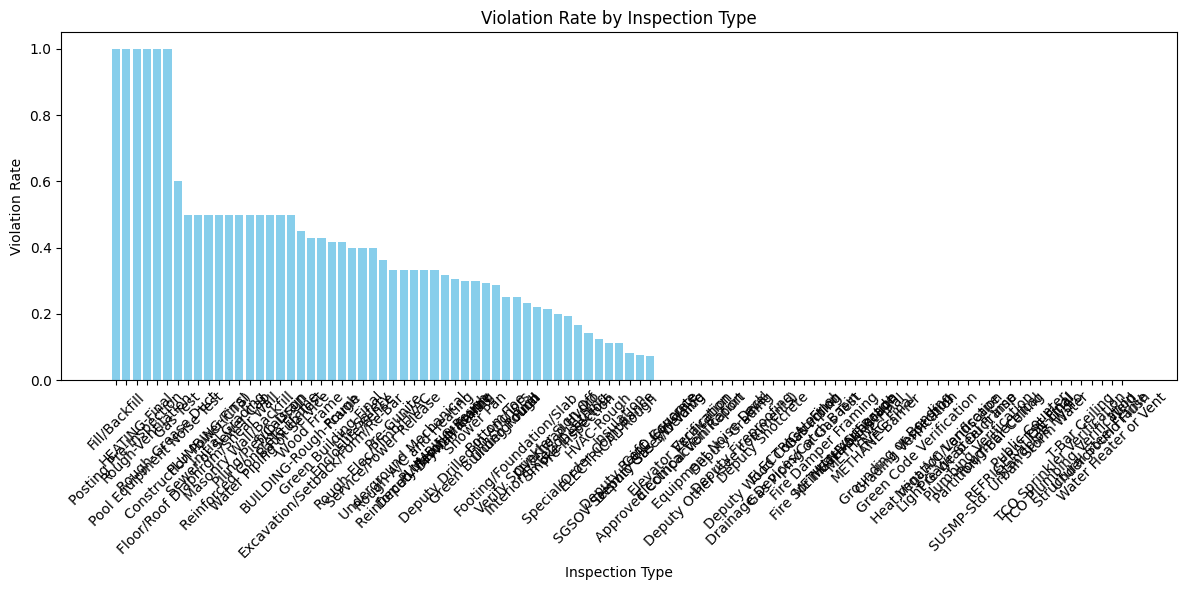

Chi-Square Statistic: 144.61759091848342
p-value: 0.0015452078431972007


In [72]:
#all of this block is generated by Copilot AI, sorry I am bit running out of time.
#Nothing diffucult , we just ask copilot compute the violation rates based on inspection types, sort, and print out the bar chart
#and then compute the p value
#I will write a short comment on this though

# Assume df has a binary 'violation' column (1 if violation occurred, 0 otherwise)
# Group by inspection type and compute the total number of violations and total inspections
violation_by_inspection = df.groupby('inspection')['violation'].agg(['sum','count']).reset_index()

# Compute the violation rate by dividing the number of violations by the total inspections
violation_by_inspection['violation_rate'] = violation_by_inspection['sum'] / violation_by_inspection['count']

# Sort by the violation rate from max to min
violation_by_inspection = violation_by_inspection.sort_values(by='violation_rate', ascending=False)

print(violation_by_inspection)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(violation_by_inspection['inspection'], violation_by_inspection['violation_rate'], color='skyblue')
plt.xlabel('Inspection Type')
plt.ylabel('Violation Rate')
plt.title('Violation Rate by Inspection Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from scipy.stats import chi2_contingency

# Create a contingency table from each inspection type, computing [violations, non-violations]
contingency = []
for inspection, group in df.groupby('inspection'):
    total = group['violation'].count()
    violations = group['violation'].sum()
    non_violations = total - violations
    contingency.append([violations, non_violations])

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")


The bar chart shows that different inspection types have very different violation rates. The chi-square statistic (about 144.62) with a very low p-value (0.00155) tells us that the differences in violation rates across the inspection types are statistically significant. So rather than saying violation is up to region, it is more likely up to the insepction type.